### PRZYGOTOWANIE CSV

In [ ]:
Wyciągam dane pickli i zapisuję je wszystko w formie .csv do dalszej analizy

In [1]:
# Importuję biblioteki 
import pandas as pd
import os
import pickle

In [502]:
# Zaczynam od rozpakowywania danych na temat cen z Brickeconomy.
# Sprawdzam ręcznie po kolei ile każdy pickle ma załadowanych kolumn. Łatwiej mi będzie ogarnąć to pakując każdy pickle do dataframe,
# i sprawnić czy wszystko dobrze się wgrało, niż iterować przez html 'na sucho'. 

pickle = pd.read_pickle('./scrapped/brickonomy_sets_1986.pkl')
df1991=pd.DataFrame(pickle)
df1991

,/set/819-1/lego-blue-baseplate,/set/1040-1/lego-dacta-duplo-farm,/set/1474-1/lego-basic-building-set-with-gift-item,/set/1475-1/lego-flight-airport-security-squad,/set/1476-1/lego-five-set-bonus-pack,/set/1477-1/lego-racing-red-race-car-number-3,/set/1478-1/lego-m-tron-mobile-satellite-up-link,/set/1479-1/lego-blacktron-2-two-pilot-craft,/set/1480-1/lego-crusaders-kings-catapult,/set/1481-1/lego-pirates-desert-island,...,/set/8074-1/lego-technic-universal-set-with-flex-system,/set/8810-1/lego-technic-cafe-racer,/set/8815-1/lego-technic-speedway-bandit,/set/8820-1/lego-technic-mountain-rambler,/set/8838-1/lego-technic-shock-cycle,/set/8856-1/lego-technic-whirlwind-rescue,/set/9353-1/lego-dacta-town-theme-set,/set/9354-1/lego-dacta-town-street-theme,/set/9361-1/lego-dacta-town-people,/set/9362-1/lego-dacta-road-plates
Info,"[Set number, 819-1, Name, Blue Baseplate, Them...","[Set number, 1040-1, Name, Farm, Theme, Dacta]","[Set number, 1474-1, Name, Basic Building Set ...","[Set number, 1475-1, Name, Airport Security Sq...","[Set number, 1476-1, Name, Five Set Bonus Pack...","[Set number, 1477-1, Name, Red Race Car Number...","[Set number, 1478-1, Name, Mobile Satellite Up...","[Set number, 1479-1, Name, Two-Pilot Craft, Th...","[Set number, 1480-1, Name, King's Catapult, Th...","[Set number, 1481-1, Name, Pirates Desert Isla...",...,"[Set number, 8074-1, Name, Universal Set with ...","[Set number, 8810-1, Name, Cafe Racer, Theme, ...","[Set number, 8815-1, Name, Speedway Bandit, Th...","[Set number, 8820-1, Name, Mountain Rambler, T...","[Set number, 8838-1, Name, Shock Cycle, Theme,...","[Set number, 8856-1, Name, Whirlwind Rescue, T...","[Set number, 9353-1, Name, Theme Set, Theme, D...","[Set number, 9354-1, Name, Town Street Theme, ...","[Set number, 9361-1, Name, People, Theme, Dacta]","[Set number, 9362-1, Name, Road Plates, Theme,..."
Prices,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","[{'Date': 1991-01-01, 'Price': 2.99}, {'Date':...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","[{'Date': 1991-01-01, 'Price': 2.99}, {'Date':...",...,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","[{'Date': 1991-01-01, 'Price': 29.99}, {'Date'..."
Monthly sales price ranges,"[{'Date': 2009-01-01, 'Min': 10.52, 'Q1': 10.9...","AttributeError(""'MissingTableError' object has...","AttributeError(""'MissingTableError' object has...","[{'Date': 2009-01-01, 'Min': 159.8, 'Q1': 165....","[{'Date': 2009-01-01, 'Min': 282.88, 'Q1': 293...","AttributeError(""'MissingTableError' object has...","[{'Date': 2009-01-01, 'Min': 71.12, 'Q1': 73.8...","[{'Date': 2009-01-01, 'Min': 75.41, 'Q1': 78.2...","[{'Date': 2009-01-01, 'Min': 102.38, 'Q1': 106...","AttributeError(""'MissingTableError' object has...",...,"[{'Date': 2009-01-01, 'Min': 121.8, 'Q1': 126....","[{'Date': 2009-03-01, 'Min': 29.39, 'Q1': 30.4...","[{'Date': 2009-01-01, 'Min': 18.41, 'Q1': 19.1...","[{'Date': 2009-01-01, 'Min': 23.5, 'Q1': 24.38...","[{'Date': 2009-01-01, 'Min': 56.97, 'Q1': 59.1...","[{'Date': 2009-01-01, 'Min': 132.41, 'Q1': 137...","AttributeError(""'MissingTableError' object has...","AttributeError(""'MissingTableError' object has...","AttributeError(""'MissingTableErr

In [445]:
# Widzę, że kolumna 'Monthly Sales Prices' ma dużo 'Attribute Error'.
# Sprawdzam czy "Attribute Error" występuje również w kolumnie "Prices"

df1986.loc['Prices']
def check_for_attribute_error_regex(row):
    pattern = re.compile(r'AttributeError')
    return any(pattern.search(str(cell)) for cell in row)

# Sprawdzanie wiersza 'Prices' pod kątem występowania "AttributeError"
contains_attribute_error = check_for_attribute_error_regex(df1986.loc['Prices'])

print(f'Czy w wierszu "Prices" występuje "AttributeError"? {contains_attribute_error}')

prices_row = df1986.loc['Prices']
unique_values = prices_row.value_counts()

# Wyświetlanie wyników
print("Unikalne wartości w wierszu 'Prices':")
print(unique_values)

In [503]:
#Usuwam kolumny, które mają 'AttributeError|RuntimeError'

# Funkcja sprawdzająca, czy kolumna zawiera "AttributeError", "RuntimeError" lub "None"
def has_error_or_none(col):
    return any(re.search(r'AttributeError|RuntimeError', str(val)) for val in col)

# Wybieramy tylko te kolumny, które nie zawierają "AttributeError", "RuntimeError" ani "None"
filtered_cols = [col for col in df1991.columns if not has_error_or_none(df1991[col])]

# Tworzymy nowy DataFrame bez kolumn zawierających błędy
filtered_df1991 = df1991[filtered_cols]

# Wyświetlenie przefiltrowanego DataFrame
filtered_df1991

,/set/819-1/lego-blue-baseplate,/set/1475-1/lego-flight-airport-security-squad,/set/1476-1/lego-five-set-bonus-pack,/set/1478-1/lego-m-tron-mobile-satellite-up-link,/set/1479-1/lego-blacktron-2-two-pilot-craft,/set/1480-1/lego-crusaders-kings-catapult,/set/1610-1/lego-police-car,/set/1611-1/lego-racing-red-race-car,/set/1656-1/lego-fire-evacuation-team,/set/1881-1/lego-play-bucket-of-bricks,...,/set/6878-1/lego-blacktron-2-sub-orbital-guardian,/set/6887-1/lego-blacktron-2-allied-avenger,/set/6933-1/lego-blacktron-2-spectral-starguider,/set/6981-1/lego-blacktron-2-aerial-intruder,/set/8074-1/lego-technic-universal-set-with-flex-system,/set/8810-1/lego-technic-cafe-racer,/set/8815-1/lego-technic-speedway-bandit,/set/8820-1/lego-technic-mountain-rambler,/set/8838-1/lego-technic-shock-cycle,/set/8856-1/lego-technic-whirlwind-rescue
Info,"[Set number, 819-1, Name, Blue Baseplate, Them...","[Set number, 1475-1, Name, Airport Security Sq...","[Set number, 1476-1, Name, Five Set Bonus Pack...","[Set number, 1478-1, Name, Mobile Satellite Up...","[Set number, 1479-1, Name, Two-Pilot Craft, Th...","[Set number, 1480-1, Name, King's Catapult, Th...","[Set number, 1610-1, Name, Police Car, Theme, ...","[Set number, 1611-1, Name, Red Race Car, Theme...","[Set number, 1656-1, Name, Evacuation Team, Th...","[Set number, 1881-1, Name, Play Bucket of Bric...",...,"[Set number, 6878-1, Name, Sub Orbital Guardia...","[Set number, 6887-1, Name, Allied Avenger, The...","[Set number, 6933-1, Name, Spectral Starguider...","[Set number, 6981-1, Name, Aerial Intruder, Th...","[Set number, 8074-1, Name, Universal Set with ...","[Set number, 8810-1, Name, Cafe Racer, Theme, ...","[Set number, 8815-1, Name, Speedway Bandit, Th...","[Set number, 8820-1, Name, Mountain Rambler, T...","[Set number, 8838-1, Name, Shock Cycle, Theme,...","[Set number, 8856-1, Name, Whirlwind Rescue, T..."
Prices,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...",...,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d..."
Monthly sales price ranges,"[{'Date': 2009-01-01, 'Min': 10.52, 'Q1': 10.9...","[{'Date': 2009-01-01, 'Min': 159.8, 'Q1': 165....","[{'Date': 2009-01-01, 'Min': 282.88, 'Q1': 293...","[{'Date': 2009-01-01, 'Min': 71.12, 'Q1': 73.8...","[{'Date': 2009-01-01, 'Min': 75.41, 'Q1': 78.2...","[{'Date': 2009-01-01, 'Min': 102.38, 'Q1': 106...","[{'Date': 2009-01-01, 'Min': 8.92, 'Q1': 9.26,...","[{'Date': 2009-01-01, 'Min': 9.38, 'Q1': 9.73,...","[{'Date': 2009-01-01, 'Min': 198.85, 'Q1': 206...","[{'Date': 2009-01-01, 'Min': 36.4, 'Q1': 37.77...",...,"[{'Date': 2009-01-01, 'Min': 48.96, 'Q1': 50.8...","[{'Date': 2009-01-01, 'Min': 57.1, 'Q1': 59.25...","[{'Date': 2009-01-01, 'Min': 101.36, 'Q1': 105...","[{'Date': 2009-01-01, 'Min': 184.82, 'Q1': 191...","[{'Date': 2009-01-01, 'Min': 121.8, 'Q1': 126....","[{'Date': 2009-03-01, 'Min': 29.39, 'Q1': 30.4...","[{'Date': 2009-01-01, 'Min': 18.41, 'Q1': 19.1...","[{'Date': 2009-01-01, 'Min': 23.5, 'Q1': 24.38...","[{'Date': 20

In [170]:
# Zapisuję każdy wyczyszczony pickle w oddzielnym dataframe

filtered_df1986
filtered_df1987
filtered_df1988
filtered_df1989
filtered_df1990
filtered_df1991
filtered_df1992
filtered_df1993
filtered_df1994
filtered_df1995
filtered_df1996
filtered_df1997
filtered_df1998
filtered_df1999
filtered_df2000
filtered_df2001
filtered_df2002
filtered_df2003
filtered_df2004
filtered_df2005
filtered_df2006
filtered_df2007
filtered_df2008
filtered_df2009
filtered_df2010
filtered_df2011
filtered_df2012
filtered_df2013
filtered_df2014
filtered_df2015
filtered_df2016
filtered_df2017
filtered_df2018
filtered_df2019
filtered_df2020


,/set/624-1/lego-basic-motor-9v,/set/626-1/lego-building-plate-green,/set/627-1/lego-blue-building-plate,/set/628-1/lego-x-large-baseplate-grey,/set/629-1/lego-three-building-plates,/set/630-1/lego-brick-separator-green,/set/631-1/lego-doors-and-windows,/set/632-1/lego-wheels-and-tyres,/set/633-1/lego-roof-tiles,/set/634-1/lego-extra-bricks-in-red,...,/set/8223-1/lego-technic-hydrofoil-7,/set/8230-1/lego-technic-coastal-cop-buggy,/set/8244-1/lego-technic-convertables,/set/8286-1/lego-technic-3-in-1-car,/set/8408-1/lego-technic-desert-ranger,/set/8425-1/lego-technic-black-hawk,/set/8443-1/lego-technic-pneumatic-log-loader,/set/8456-1/lego-technic-fiber-optic-multi-set,/set/9293-1/lego-dacta-community-workers,/set/9833-1/lego-dacta-technic-transformer-9v
Info,"[Set number, 624-1, Name, Basic Motor, 9V, The...","[Set number, 626-1, Name, Building Plate, Gree...","[Set number, 627-1, Name, Blue Building Plate,...","[Set number, 628-1, Name, X-Large Baseplate Gr...","[Set number, 629-1, Name, Three Building Plate...","[Set number, 630-1, Name, Brick Separator, Gre...","[Set number, 631-1, Name, Doors and Windows, T...","[Set number, 632-1, Name, Wheels and Tyres, Th...","[Set number, 633-1, Name, Roof Tiles, Theme, B...","[Set number, 634-1, Name, Extra Bricks in Red,...",...,"[Set number, 8223-1, Name, Hydrofoil 7, Theme,...","[Set number, 8230-1, Name, Coastal Cop Buggy, ...","[Set number, 8244-1, Name, Convertables, Theme...","[Set number, 8286-1, Name, 3-In-1 Car, Theme, ...","[Set number, 8408-1, Name, Desert Ranger, Them...","[Set number, 8425-1, Name, Black Hawk, Theme, ...","[Set number, 8443-1, Name, Pneumatic Log Loade...","[Set number, 8456-1, Name, Fiber Optic Multi S...","[Set number, 9293-1, Name, Community Workers, ...","[Set number, 9833-1, Name, Transformer 9V, The..."
Prices,"<div id=""pricechart"" style=""height: 300px;""><d...","[{'Date': 2016-02-25, 'Price': 4.99}, {'Date':...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...",...,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d..."
Monthly sales price ranges,"[{'Date': 2009-01-01, 'Min': 30.75, 'Q1': 31.9...","[{'Date': 2009-01-01, 'Min': 7.04, 'Q1': 7.31,...","[{'Date': 2009-01-01, 'Min': 12.43, 'Q1': 12.9...","[{'Date': 2017-08-01, 'Min': 19.21, 'Q1': 20.2...","[{'Date': 2009-01-01, 'Min': 11.35, 'Q1': 11.7...","[{'Date': 2015-06-01, 'Min': 2.78, 'Q1': 2.94,...","[{'Date': 2009-01-01, 'Min': 13.58, 'Q1': 14.1...","[{'Date': 2009-01-01, 'Min': 10.92, 'Q1': 11.3...","[{'Date': 2009-01-01, 'Min': 11.41, 'Q1': 11.8...","[{'Date': 2009-01-01, 'Min': 11.03, 'Q1': 11.4...",...,"[{'Date': 2009-01-01, 'Min': 22.94, 'Q1': 23.8...","[{'Date': 2009-01-01, 'Min': 35.35, 'Q1': 36.6...","[{'Date': 2009-01-01, 'Min': 39.17, 'Q1': 40.6...","[{'Date': 2009-01-01, 'Min': 98.78, 'Q1': 102....","[{'Date': 2009-01-01, 'Min': 49.05, 'Q1': 50.9...","[{'Date': 2009-01-01, 'Min': 86.8, 'Q1': 90.07...","[{'Date': 2009-01-01, 'Min': 146.57, 'Q1': 152...","[{'Date': 2009-01-01, 'Min': 136.45, 'Q1': 141...","[{'Date': 2009-01-01, 'Min': 79.27, 'Q1': 82.2...","[{'Date': 2009-01-01, 'Min': 26.08, 'Q1':

In [518]:
# ładuję wszystkie dataframe w jedno

combined_df = pd.concat([filtered_df1986,filtered_df1987,filtered_df1988,filtered_df1989,filtered_df1990,filtered_df1991,filtered_df1992,filtered_df1993,filtered_df1994,filtered_df1995,filtered_df1996,filtered_df1997,filtered_df1998,filtered_df1999,filtered_df2000,filtered_df2001,filtered_df2002,filtered_df2003,filtered_df2004,filtered_df2005,filtered_df2006,filtered_df2007,filtered_df2008,filtered_df2009,filtered_df2010,filtered_df2011,filtered_df2012,filtered_df2013,filtered_df2014,filtered_df2015,filtered_df2016,filtered_df2017,filtered_df2018,filtered_df2019,filtered_df2020], axis=1)
combined_df


,/set/800-2/lego-extra-bricks-red,/set/801-2/lego-extra-bricks-blue,/set/802-2/lego-extra-bricks-white,/set/803-1/lego-extra-bricks-yellow,/set/804-1/lego-extra-bricks-black,/set/805-1/lego-extra-bricks-grey,/set/806-1/lego-extra-plates-blue,/set/807-1/lego-extra-plates-red,/set/808-1/lego-wheels-and-tyres,/set/809-1/lego-doors-and-windows,...,/set/SID00159110-1/lego-isle-of-peril,/set/SID00159120-1/lego-eight-studs,/set/SID00159130-1/lego-science-tower,/set/SID00159140-1/the-lego-story,/set/SID00159150-1/lego-imagine-it-build-it,/set/SID00159160-1/lego-hot-shot-carnival,/set/SID00159170-1/lego-vintage-roadster,/set/SID00159180-1/lego-bikes,/set/SID00159190-1/lego-steampunk-mini-chess,/set/45810-1/education-first-lego-league-boomtown-build
Info,"[Set number, 800-2, Name, Extra Bricks Red, Th...","[Set number, 801-2, Name, Extra Bricks Blue, T...","[Set number, 802-2, Name, Extra Bricks White, ...","[Set number, 803-1, Name, Extra Bricks Yellow,...","[Set number, 804-1, Name, Extra Bricks Black, ...","[Set number, 805-1, Name, Extra Bricks Grey, T...","[Set number, 806-1, Name, Extra Plates Blue, T...","[Set number, 807-1, Name, Extra Plates Red, Th...","[Set number, 808-1, Name, Wheels and Tyres, Th...","[Set number, 809-1, Name, Doors and Windows, T...",...,"[Name, Isle of Peril, Theme, BrickLink, Subthe...","[Name, Eight Studs, Theme, BrickLink, Subtheme...","[Name, Science Tower, Theme, BrickLink, Subthe...","[Name, The LEGO Story, Theme, BrickLink, Subth...","[Name, Imagine it! Build it!, Theme, BrickLink...","[Name, Hot Shot Carnival, Theme, BrickLink, Su...","[Name, Vintage Roadster, Theme, BrickLink, Sub...","[Name, Bikes!, Theme, BrickLink, Subtheme, AFO...","[Name, Steampunk Mini Chess, Theme, BrickLink,...","[Set number, 45810-1, Name, Boomtown Build, Th..."
Prices,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...",...,"<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d...","[{'Date': 2019-01-15, 'Price': 129.99}, {'Date...","[{'Date': 2019-01-15, 'Price': 99.0}, {'Date':...","<div id=""pricechart"" style=""height: 300px;""><d...","[{'Date': 2019-01-15, 'Price': 57.99}, {'Date'...","[{'Date': 2019-01-15, 'Price': 54.99}, {'Date'...","[{'Date': 2019-01-15, 'Price': 49.99}, {'Date'...","<div id=""pricechart"" style=""height: 300px;""><d...","<div id=""pricechart"" style=""height: 300px;""><d..."
Monthly sales price ranges,"[{'Date': 2009-01-01, 'Min': 9.86, 'Q1': 10.23...","[{'Date': 2009-01-01, 'Min': 16.77, 'Q1': 17.4...","[{'Date': 2009-01-01, 'Min': 17.26, 'Q1': 17.9...","[{'Date': 2009-01-01, 'Min': 11.0, 'Q1': 11.42...","[{'Date': 2009-01-01, 'Min': 13.07, 'Q1': 13.5...","[{'Date': 2009-01-01, 'Min': 12.22, 'Q1': 12.6...","[{'Date': 2009-01-01, 'Min': 14.69, 'Q1': 15.2...","[{'Date': 2009-01-01, 'Min': 14.54, 'Q1': 15.0...","[{'Date': 2009-01-01, 'Min': 13.19, 'Q1': 13.6...","[{'Date': 2009-01-01, 'Min': 13.46, 'Q1': 13.9...",...,"[{'Date': 2019-08-01, 'Min': 224.1, 'Q1': 236....",None,"[{'Date': 2019-08-01, 'Min': 327.26, 'Q1': 345...","[{'Date': 2019-10-01, 'Min': 154.47, 'Q1': 163...",None,"[{'Date': 2019-07-01, 'Min': 165.53, 'Q1': 171...","[{'Date': 2019-08-01, 'Min': 119.35, 'Q1': 125...","[{'Date': 2019-08-01, 'Min': 131.99, 'Q1': 139...","[{'Date': 2019-08-01, 'Min': 120.18, 'Q1': 126...","[{'Date': 2020-10-01, 'Min': 54.0, 'Q1': 57.0,..."
Error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [519]:
# Robię ekstrakcję danych z list i słowników: nr. setu, nazwę, datę pomiaru ceny i widełki ceny.

data_to_add = []


for col_idx in range(len(combined_df.columns)):  # 5100
    try:
        monthly_prices_list = combined_df.loc['Monthly sales price ranges'][col_idx]
        print('Yay!') #DupaDebugging
        print(col_idx)

        for idx in range(len(monthly_prices_list)):
            try:

                info = combined_df.loc['Info'][col_idx][1]
                name = combined_df.loc['Info'][col_idx][3]  
                date = monthly_prices_list[idx]['Date']
                min_val = monthly_prices_list[idx]['Min']
                q1_val = monthly_prices_list[idx]['Q1']  
                q3_val = monthly_prices_list[idx]['Q3'] 
                max_val = monthly_prices_list[idx]['Max']
                

                data_to_add.append((info, name, date, min_val, q1_val, q3_val, max_val))
            except TypeError as e:
                if "object of type 'NoneType' has no len()" in str(e):
                    continue

    except TypeError as e:
        if "object of type 'NoneType' has no len()" in str(e):
            continue

brickonomy_sets = pd.DataFrame(data_to_add, columns=['Set_no', 'Name', 'Date', 'Min', 'Q1', 'Q3', 'Max'])


Yay!
0
Yay!
1
Yay!
2
Yay!
3
Yay!
4
Yay!
5
Yay!
6
Yay!
7
Yay!
8
Yay!
9
Yay!
10
Yay!
11
Yay!
12
Yay!
13
Yay!
14
Yay!
15
Yay!
16
Yay!
17
Yay!
18
Yay!
19
Yay!
20
Yay!
21
Yay!
22
Yay!
23
Yay!
24
Yay!
25
Yay!
26
Yay!
27
Yay!
28
Yay!
29
Yay!
30
Yay!
31
Yay!
32
Yay!
33
Yay!
34
Yay!
35
Yay!
36
Yay!
37
Yay!
38
Yay!
39
Yay!
40
Yay!
41
Yay!
42
Yay!
43
Yay!
44
Yay!
45
Yay!
46
Yay!
47
Yay!
48
Yay!
49
Yay!
50
Yay!
51
Yay!
52
Yay!
53
Yay!
54
Yay!
55
Yay!
56
Yay!
57
Yay!
58
Yay!
59
Yay!
60
Yay!
61
Yay!
62
Yay!
63
Yay!
64
Yay!
65
Yay!
66
Yay!
67
Yay!
68
Yay!
69
Yay!
70
Yay!
71
Yay!
72
Yay!
73
Yay!
74
Yay!
75
Yay!
76
Yay!
77
Yay!
78
Yay!
79
Yay!
80
Yay!
81
Yay!
82
Yay!
83
Yay!
84
Yay!
85
Yay!
86
Yay!
87
Yay!
88
Yay!
89
Yay!
90
Yay!
91
Yay!
92
Yay!
93
Yay!
94
Yay!
95
Yay!
96
Yay!
97
Yay!
98
Yay!
99
Yay!
100
Yay!
101
Yay!
102
Yay!
103
Yay!
104
Yay!
105
Yay!
106
Yay!
107
Yay!
108
Yay!
109
Yay!
110
Yay!
111
Yay!
112
Yay!
113
Yay!
114
Yay!
115
Yay!
116
Yay!
117
Yay!
118
Yay!
119
Yay!
120
Yay!
121
Yay!
122
Yay

Yay!
927
Yay!
928
Yay!
929
Yay!
930
Yay!
931
Yay!
932
Yay!
933
Yay!
934
Yay!
935
Yay!
936
Yay!
937
Yay!
938
Yay!
939
Yay!
940
Yay!
941
Yay!
942
Yay!
943
Yay!
944
Yay!
945
Yay!
946
Yay!
947
Yay!
948
Yay!
949
Yay!
950
Yay!
951
Yay!
952
Yay!
953
Yay!
954
Yay!
955
Yay!
956
Yay!
957
Yay!
958
Yay!
959
Yay!
960
Yay!
961
Yay!
962
Yay!
963
Yay!
964
Yay!
965
Yay!
966
Yay!
967
Yay!
968
Yay!
969
Yay!
970
Yay!
971
Yay!
972
Yay!
973
Yay!
974
Yay!
975
Yay!
976
Yay!
977
Yay!
978
Yay!
979
Yay!
980
Yay!
981
Yay!
982
Yay!
983
Yay!
984
Yay!
985
Yay!
986
Yay!
987
Yay!
988
Yay!
989
Yay!
990
Yay!
991
Yay!
992
Yay!
993
Yay!
994
Yay!
995
Yay!
996
Yay!
997
Yay!
998
Yay!
999
Yay!
1000
Yay!
1001
Yay!
1002
Yay!
1003
Yay!
1004
Yay!
1005
Yay!
1006
Yay!
1007
Yay!
1008
Yay!
1009
Yay!
1010
Yay!
1011
Yay!
1012
Yay!
1013
Yay!
1014
Yay!
1015
Yay!
1016
Yay!
1017
Yay!
1018
Yay!
1019
Yay!
1020
Yay!
1021
Yay!
1022
Yay!
1023
Yay!
1024
Yay!
1025
Yay!
1026
Yay!
1027
Yay!
1028
Yay!
1029
Yay!
1030
Yay!
1031
Yay!
1032
Yay!
1033
Yay

Yay!
1766
Yay!
1767
Yay!
1768
Yay!
1769
Yay!
1770
Yay!
1771
Yay!
1772
Yay!
1773
Yay!
1774
Yay!
1775
Yay!
1776
Yay!
1777
Yay!
1778
Yay!
1779
Yay!
1780
Yay!
1781
Yay!
1782
Yay!
1783
Yay!
1784
Yay!
1785
Yay!
1786
Yay!
1787
Yay!
1788
Yay!
1789
Yay!
1790
Yay!
1791
Yay!
1792
Yay!
1793
Yay!
1794
Yay!
1795
Yay!
1796
Yay!
1797
Yay!
1798
Yay!
1799
Yay!
1800
Yay!
1801
Yay!
1802
Yay!
1803
Yay!
1804
Yay!
1805
Yay!
1806
Yay!
1807
Yay!
1808
Yay!
1809
Yay!
1810
Yay!
1811
Yay!
1812
Yay!
1813
Yay!
1814
Yay!
1815
Yay!
1816
Yay!
1817
Yay!
1818
Yay!
1819
Yay!
1820
Yay!
1821
Yay!
1822
Yay!
1823
Yay!
1824
Yay!
1825
Yay!
1826
Yay!
1827
Yay!
1828
Yay!
1829
Yay!
1830
Yay!
1831
Yay!
1832
Yay!
1833
Yay!
1834
Yay!
1835
Yay!
1836
Yay!
1837
Yay!
1838
Yay!
1839
Yay!
1840
Yay!
1841
Yay!
1842
Yay!
1843
Yay!
1844
Yay!
1845
Yay!
1846
Yay!
1847
Yay!
1848
Yay!
1849
Yay!
1850
Yay!
1851
Yay!
1852
Yay!
1853
Yay!
1854
Yay!
1855
Yay!
1856
Yay!
1857
Yay!
1858
Yay!
1859
Yay!
1860
Yay!
1861
Yay!
1862
Yay!
1863
Yay!
1864
Yay!
1865


Yay!
2588
Yay!
2589
Yay!
2590
Yay!
2591
Yay!
2592
Yay!
2593
Yay!
2594
Yay!
2595
Yay!
2596
Yay!
2597
Yay!
2598
Yay!
2599
Yay!
2600
Yay!
2601
Yay!
2602
Yay!
2603
Yay!
2604
Yay!
2605
Yay!
2606
Yay!
2607
Yay!
2608
Yay!
2609
Yay!
2610
Yay!
2611
Yay!
2612
Yay!
2613
Yay!
2614
Yay!
2615
Yay!
2616
Yay!
2617
Yay!
2618
Yay!
2619
Yay!
2620
Yay!
2621
Yay!
2622
Yay!
2623
Yay!
2624
Yay!
2625
Yay!
2626
Yay!
2627
Yay!
2628
Yay!
2629
Yay!
2630
Yay!
2631
Yay!
2632
Yay!
2633
Yay!
2634
Yay!
2635
Yay!
2636
Yay!
2637
Yay!
2638
Yay!
2639
Yay!
2640
Yay!
2641
Yay!
2642
Yay!
2643
Yay!
2644
Yay!
2645
Yay!
2646
Yay!
2647
Yay!
2648
Yay!
2649
Yay!
2650
Yay!
2651
Yay!
2652
Yay!
2653
Yay!
2654
Yay!
2655
Yay!
2656
Yay!
2657
Yay!
2658
Yay!
2659
Yay!
2660
Yay!
2661
Yay!
2662
Yay!
2663
Yay!
2664
Yay!
2665
Yay!
2666
Yay!
2667
Yay!
2668
Yay!
2669
Yay!
2670
Yay!
2671
Yay!
2672
Yay!
2673
Yay!
2674
Yay!
2675
Yay!
2676
Yay!
2677
Yay!
2678
Yay!
2679
Yay!
2680
Yay!
2681
Yay!
2682
Yay!
2683
Yay!
2684
Yay!
2685
Yay!
2686
Yay!
2687


Yay!
3409
Yay!
3410
Yay!
3411
Yay!
3412
Yay!
3413
Yay!
3414
Yay!
3415
Yay!
3416
Yay!
3417
Yay!
3418
Yay!
3419
Yay!
3420
Yay!
3421
Yay!
3422
Yay!
3423
Yay!
3424
Yay!
3425
Yay!
3426
Yay!
3427
Yay!
3428
Yay!
3429
Yay!
3430
Yay!
3431
Yay!
3432
Yay!
3433
Yay!
3434
Yay!
3435
Yay!
3436
Yay!
3437
Yay!
3438
Yay!
3439
Yay!
3440
Yay!
3441
Yay!
3442
Yay!
3443
Yay!
3444
Yay!
3445
Yay!
3446
Yay!
3447
Yay!
3448
Yay!
3449
Yay!
3450
Yay!
3451
Yay!
3452
Yay!
3453
Yay!
3454
Yay!
3455
Yay!
3456
Yay!
3457
Yay!
3458
Yay!
3459
Yay!
3460
Yay!
3461
Yay!
3462
Yay!
3463
Yay!
3464
Yay!
3465
Yay!
3466
Yay!
3467
Yay!
3468
Yay!
3469
Yay!
3470
Yay!
3471
Yay!
3472
Yay!
3473
Yay!
3474
Yay!
3475
Yay!
3476
Yay!
3477
Yay!
3478
Yay!
3479
Yay!
3480
Yay!
3481
Yay!
3482
Yay!
3483
Yay!
3484
Yay!
3485
Yay!
3486
Yay!
3487
Yay!
3488
Yay!
3489
Yay!
3490
Yay!
3491
Yay!
3492
Yay!
3493
Yay!
3494
Yay!
3495
Yay!
3496
Yay!
3497
Yay!
3498
Yay!
3499
Yay!
3500
Yay!
3501
Yay!
3502
Yay!
3503
Yay!
3504
Yay!
3505
Yay!
3506
Yay!
3507
Yay!
3508


Yay!
4240
Yay!
4241
Yay!
4242
Yay!
4243
Yay!
4244
Yay!
4245
Yay!
4246
Yay!
4247
Yay!
4248
Yay!
4249
Yay!
4250
Yay!
4251
Yay!
4252
Yay!
4253
Yay!
4254
Yay!
4255
Yay!
4256
Yay!
4257
Yay!
4258
Yay!
4259
Yay!
4260
Yay!
4261
Yay!
4262
Yay!
4263
Yay!
4264
Yay!
4265
Yay!
4266
Yay!
4267
Yay!
4268
Yay!
4269
Yay!
4270
Yay!
4271
Yay!
4272
Yay!
4273
Yay!
4274
Yay!
4275
Yay!
4276
Yay!
4277
Yay!
4278
Yay!
4279
Yay!
4280
Yay!
4281
Yay!
4282
Yay!
4283
Yay!
4284
Yay!
4285
Yay!
4286
Yay!
4287
Yay!
4288
Yay!
4289
Yay!
4290
Yay!
4291
Yay!
4292
Yay!
4293
Yay!
4294
Yay!
4295
Yay!
4296
Yay!
4297
Yay!
4298
Yay!
4299
Yay!
4300
Yay!
4301
Yay!
4302
Yay!
4303
Yay!
4304
Yay!
4305
Yay!
4306
Yay!
4307
Yay!
4308
Yay!
4309
Yay!
4310
Yay!
4311
Yay!
4312
Yay!
4313
Yay!
4314
Yay!
4315
Yay!
4316
Yay!
4317
Yay!
4318
Yay!
4319
Yay!
4320
Yay!
4321
Yay!
4322
Yay!
4323
Yay!
4324
Yay!
4325
Yay!
4326
Yay!
4327
Yay!
4328
Yay!
4329
Yay!
4330
Yay!
4331
Yay!
4332
Yay!
4333
Yay!
4334
Yay!
4335
Yay!
4336
Yay!
4337
Yay!
4338
Yay!
4339


Yay!
5076
Yay!
5077
Yay!
5078
Yay!
5079
Yay!
5080
Yay!
5081
Yay!
5082
Yay!
5083
Yay!
5084
Yay!
5085
Yay!
5086
Yay!
5087
Yay!
5088
Yay!
5089
Yay!
5090
Yay!
5091
Yay!
5092
Yay!
5093
Yay!
5094
Yay!
5095
Yay!
5096
Yay!
5097
Yay!
5098
Yay!
5099
Yay!
5100
Yay!
5101
Yay!
5102
Yay!
5103
Yay!
5104
Yay!
5105
Yay!
5106
Yay!
5107
Yay!
5108
Yay!
5109
Yay!
5110
Yay!
5111
Yay!
5112
Yay!
5113
Yay!
5114
Yay!
5115
Yay!
5116
Yay!
5117
Yay!
5118
Yay!
5119
Yay!
5120
Yay!
5121
Yay!
5122
Yay!
5123
Yay!
5124
Yay!
5125
Yay!
5126
Yay!
5127
Yay!
5128
Yay!
5129
Yay!
5130
Yay!
5131
Yay!
5132
Yay!
5133
Yay!
5134
Yay!
5135
Yay!
5136
Yay!
5137
Yay!
5138
Yay!
5139
Yay!
5140
Yay!
5141
Yay!
5142
Yay!
5143
Yay!
5144
Yay!
5145
Yay!
5146
Yay!
5147
Yay!
5148
Yay!
5149
Yay!
5150
Yay!
5151
Yay!
5152
Yay!
5153
Yay!
5154
Yay!
5155
Yay!
5156
Yay!
5157
Yay!
5158
Yay!
5159
Yay!
5160
Yay!
5161
Yay!
5162
Yay!
5163
Yay!
5164
Yay!
5165
Yay!
5166
Yay!
5167
Yay!
5168
Yay!
5169
Yay!
5170
Yay!
5171
Yay!
5172
Yay!
5173
Yay!
5174
Yay!
5175


Yay!
5921
Yay!
5922
Yay!
5923
Yay!
5924
Yay!
5925
Yay!
5926
Yay!
5927
Yay!
5928
Yay!
5929
Yay!
5930
Yay!
5931
Yay!
5932
Yay!
5933
Yay!
5934
Yay!
5935
Yay!
5936
Yay!
5937
Yay!
5938
Yay!
5939
Yay!
5940
Yay!
5941
Yay!
5942
Yay!
5943
Yay!
5944
Yay!
5945
Yay!
5946
Yay!
5947
Yay!
5948
Yay!
5949
Yay!
5950
Yay!
5951
Yay!
5952
Yay!
5953
Yay!
5954
Yay!
5955
Yay!
5956
Yay!
5957
Yay!
5958
Yay!
5959
Yay!
5960
Yay!
5961
Yay!
5962
Yay!
5963
Yay!
5964
Yay!
5965
Yay!
5966
Yay!
5967
Yay!
5968
Yay!
5969
Yay!
5970
Yay!
5971
Yay!
5972
Yay!
5973
Yay!
5974
Yay!
5975
Yay!
5976
Yay!
5977
Yay!
5978
Yay!
5979
Yay!
5980
Yay!
5981
Yay!
5982
Yay!
5983
Yay!
5984
Yay!
5985
Yay!
5986
Yay!
5987
Yay!
5988
Yay!
5989
Yay!
5990
Yay!
5991
Yay!
5992
Yay!
5993
Yay!
5994
Yay!
5995
Yay!
5996
Yay!
5997
Yay!
5998
Yay!
5999
Yay!
6000
Yay!
6001
Yay!
6002
Yay!
6003
Yay!
6004
Yay!
6005
Yay!
6006
Yay!
6007
Yay!
6008
Yay!
6009
Yay!
6010
Yay!
6011
Yay!
6012
Yay!
6013
Yay!
6014
Yay!
6015
Yay!
6016
Yay!
6017
Yay!
6018
Yay!
6019
Yay!
6020


Yay!
6742
Yay!
6743
Yay!
6744
Yay!
6745
Yay!
6746
Yay!
6747
Yay!
6748
Yay!
6749
Yay!
6750
Yay!
6751
Yay!
6752
Yay!
6753
Yay!
6754
Yay!
6755
Yay!
6756
Yay!
6757
Yay!
6758
Yay!
6759
Yay!
6760
Yay!
6761
Yay!
6762
Yay!
6763
Yay!
6764
Yay!
6765
Yay!
6766
Yay!
6767
Yay!
6768
Yay!
6769
Yay!
6770
Yay!
6771
Yay!
6772
Yay!
6773
Yay!
6774
Yay!
6775
Yay!
6776
Yay!
6777
Yay!
6778
Yay!
6779
Yay!
6780
Yay!
6781
Yay!
6782
Yay!
6783
Yay!
6784
Yay!
6785
Yay!
6786
Yay!
6787
Yay!
6788
Yay!
6789
Yay!
6790
Yay!
6791
Yay!
6792
Yay!
6793
Yay!
6794
Yay!
6795
Yay!
6796
Yay!
6797
Yay!
6798
Yay!
6799
Yay!
6800
Yay!
6801
Yay!
6802
Yay!
6803
Yay!
6804
Yay!
6805
Yay!
6806
Yay!
6807
Yay!
6808
Yay!
6809
Yay!
6810
Yay!
6811
Yay!
6812
Yay!
6813
Yay!
6814
Yay!
6815
Yay!
6816
Yay!
6817
Yay!
6818
Yay!
6819
Yay!
6820
Yay!
6821
Yay!
6822
Yay!
6823
Yay!
6824
Yay!
6825
Yay!
6826
Yay!
6827
Yay!
6828
Yay!
6829
Yay!
6830
Yay!
6831
Yay!
6832
Yay!
6833
Yay!
6834
Yay!
6835
Yay!
6836
Yay!
6837
Yay!
6838
Yay!
6839
Yay!
6840
Yay!
6841


Yay!
7630
Yay!
7631
Yay!
7632
Yay!
7633
Yay!
7634
Yay!
7635
Yay!
7636
Yay!
7637
Yay!
7638
Yay!
7639
Yay!
7640
Yay!
7641
Yay!
7642
Yay!
7643
Yay!
7644
Yay!
7645
Yay!
7646
Yay!
7647
Yay!
7648
Yay!
7649


In [520]:
#Sprawdzam, czy dobrze się wszystko zapisało
brickonomy_sets.shape
brickonomy_sets.head(5)

,Set_no,Name,Date,Min,Q1,Q3,Max
0,800-2,Extra Bricks Red,2009-01-01,9.86,10.23,11.35,12.09
1,800-2,Extra Bricks Red,2009-02-01,9.47,10.00,11.57,12.63
2,800-2,Extra Bricks Red,2009-03-01,9.32,9.67,10.73,11.43
3,800-2,Extra Bricks Red,2009-04-01,9.51,10.04,11.62,12.68
4,800-2,Extra Bricks Red,2009-05-01,9.94,10.32,11.44,12.19


In [521]:
# Zapisuję do .csv na dysku do ręcznego czyszczenia
brickonomy_sets.to_csv('sets_new.csv', index=False)

In [477]:
# Pobieranie dalszych szczegółów "info" setów Brickeconomy. Nie są to ważne dane, ale będą mi potrzebne do weryfikacji
# podczas merge z tabelą Brickset_info

data_new = []
monthly_prices_list = range(len(combined_df.columns))

for idx in range(len(monthly_prices_list)):
    print('Yay!') #Dupadebugging
    print(col_idx)
    set_no = combined_df.loc['Info'][idx][1]
    name = combined_df.loc['Info'][idx][3]
    theme = combined_df.loc['Info'][idx][5]
    
    data_new.append((set_no, name, theme))

brickonomy_info = pd.DataFrame(data_new, columns=['Set_no', 'Name', 'Theme'])
basic

Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!


Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!


Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!


Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!
Yay!


,Set_no,Name,Theme
0,800-2,Extra Bricks Red,Basic
1,801-2,Extra Bricks Blue,Basic
2,802-2,Extra Bricks White,Basic
3,803-1,Extra Bricks Yellow,Basic
4,804-1,Extra Bricks Black,Basic
5,805-1,Extra Bricks Grey,Basic
6,806-1,Extra Plates Blue,Basic
7,807-1,Extra Plates Red,Basic
8,808-1,Wheels and Tyres,Basic
9,809-1,Doors and Windows,Basic


In [478]:
# Zapisuję do .csv na dysku do ręcznego czyszczenia
brickonomy_info.to_csv('basic2.csv', index=False)

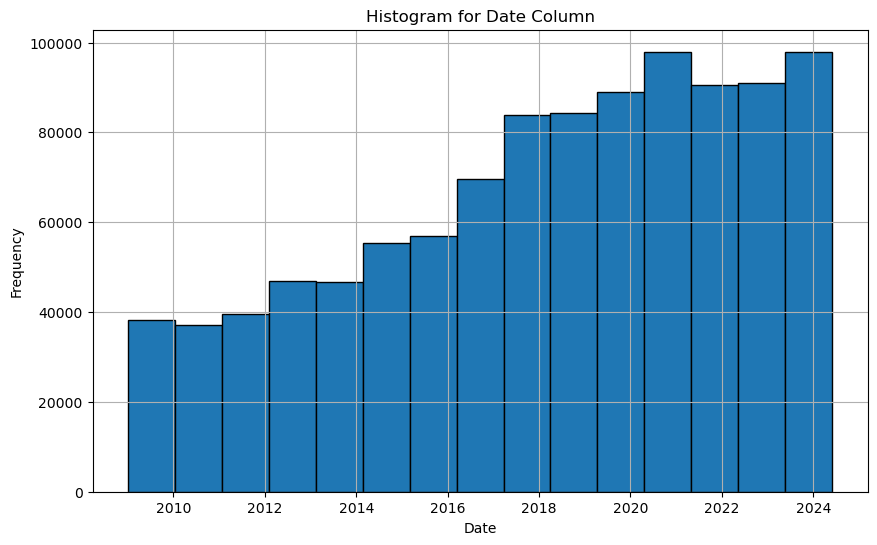

In [479]:
# Sprawdzam jak wygląda rozkład kolumny z ilością danych z datami w brickset_price 

import matplotlib.pyplot as plt
brickonomy_sets['Date'] = pd.to_datetime(brickonomy_sets['Date'])

# Tworzenie histogramu
plt.figure(figsize=(10, 6))
brickonomy_sets['Date'].hist(bins=15, edgecolor='black')

# Dodanie tytułu i etykiet
plt.title('Histogram for Date Column')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Wyświetlenie histogramu
plt.show()